<a href="https://colab.research.google.com/github/oluwafemiomitusa/Urbanization-and-Climate-Change/blob/main/nexrad_level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
pip install -q pyproj arm-pyart cartopy wradlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.2/272.2 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 13.8 MB/s eta 0:00:00


In [ ]:
print(__doc__)

# Author: Max Grover (mgrover@anl.gov)
# License: BSD 3 clause

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import pyart

Automatically created module for IPython interactive environment

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [ ]:
aws_nexrad_level3_velocity_file = (
    "s3://unidata-nexrad-level3/HGX_N1P_2022_03_22_12_01_25"
)
aws_nexrad_level3_reflectivity_file = (
    "s3://unidata-nexrad-level3/HGX_N1P_2022_03_22_12_01_25"
)

In [ ]:
radar_level3_velocity = pyart.io.read_nexrad_level3(aws_nexrad_level3_velocity_file)
radar_level3_reflectivity = pyart.io.read_nexrad_level3(
    aws_nexrad_level3_reflectivity_file
)

In [ ]:
print(
    "velocity radar object: ",
    list(radar_level3_velocity.fields),
    "reflectivity radar object: ",
    list(radar_level3_reflectivity.fields),
)

In [ ]:
fig = plt.figure(figsize=(12, 4))
reflectivity_display = pyart.graph.RadarMapDisplay(radar_level3_reflectivity)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

reflectivity_display.plot_ppi_map(
    "radar_estimated_rain_rate",
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

velocity_display = pyart.graph.RadarMapDisplay(radar_level3_velocity)

ax = plt.subplot(122, projection=ccrs.PlateCarree())

velocity_display.plot_ppi_map(
    "velocity",
    ax=ax,
    colorbar_label="Radial Velocity ($V_{r}$) \n (m/s)",
    vmin=-70,
    vmax=70,
)

In [ ]:
# Define the variable
aws_nexrad_level3_precip_file = (
    "s3://unidata-nexrad-level3/HGX_N1P_2022_03_22_12_01_25"
)
# Read the data using PyART
radar_level3_precip = pyart.io.read_nexrad_level3(aws_nexrad_level3_precip_file)
# Obtain precip data
radar_level3_precip.fields['radar_estimated_rain_rate']['data']
# Obtain lons and lats
#radar_level3_precip.longitude['data']
#radar_level3_precip.latitude['data']

In [ ]:

# Visualize the precip
fig = plt.figure(figsize=(12, 4))
precip_display = pyart.graph.RadarMapDisplay(radar_level3_precip)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

precip_display.plot_ppi_map(
    "radar_estimated_rain_rate",
    ax=ax,
    vmin=0,
    vmax=5,
)

# Exract values precip values with the longitude and latitude values

In [ ]:
import numpy as np
import wradlib as wrl
import pyproj
from numpy import ma

# Define the variable
aws_nexrad_level3_precip_file = "s3://unidata-nexrad-level3/HGX_N1P_2022_06_24_22_25_00"

# Read the data using PyART
radar_level3_precip = pyart.io.read_nexrad_level3(aws_nexrad_level3_precip_file)

# Get radar gate (data point) information
azimuths = radar_level3_precip.azimuth['data']
ranges = radar_level3_precip.range['data']
elevation = radar_level3_precip.elevation['data'][0]  # assuming all elevations are the same

# Get radar location
radar_lon = radar_level3_precip.longitude['data'][0]
radar_lat = radar_level3_precip.latitude['data'][0]

# Define the WGS84 ellipsoid
wgs84 = pyproj.Proj(proj='latlong', datum='WGS84')

# Convert (azimuth, range, elevation) to (x, y, z) in the WGS84 projection

coords = wrl.georef.polar.spherical_to_proj(ranges, azimuths, elevation, (radar_lon, radar_lat))

lon = coords[..., 0]
lat = coords[..., 1]

# Obtain precipitation data
precip_data = radar_level3_precip.fields['radar_estimated_rain_rate']['data']

# Apply the mask to the precipitation data
masked_precip_data = ma.masked_array(precip_data, mask=radar_level3_precip.fields['radar_estimated_rain_rate']['data'].mask)

# Get the precipitation values without the masked values
precip_values = masked_precip_data.compressed()

# Now, precip_values, lon, lat, x, y all have the same shape (without the masked values)
# Apply the mask to lon and lat arrays
lon_masked = ma.masked_array(lon, mask=masked_precip_data.mask)
lat_masked = ma.masked_array(lat, mask=masked_precip_data.mask)

# Get the lon and lat values without the masked values
lon_values = lon_masked.compressed()
lat_values = lat_masked.compressed()

# Assuming you have a DataFrame called 'df' with columns 'Longitude', 'Latitude', and 'Precipitation'
data = {'Longitude': lon_values, 'Latitude': lat_values, 'Precipitation': precip_values}
df = pd.DataFrame(data)

# Filter the DataFrame to include only precipitation values above 0
filtered_df = df.loc[df['Precipitation'] > 0]

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv('filtered_precip.csv', index=False)

# Display the filtered DataFrame
print(filtered_df)


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'Longitude', 'Latitude', and 'Precipitation'
data = {'Longitude': lon_values, 'Latitude': lat_values, 'Precipitation': precip_values}
df = pd.DataFrame(data)

# Filter the DataFrame to include only precipitation values above 0
filtered_df = df.loc[df['Precipitation'] > 0]

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv('filtered_precip.csv', index=False)

# Display the filtered DataFrame
print(filtered_df)


## Extract the precip data from the radar L3 data for each longitude and latitude. The specific code below is for June 2022 dataaset.

In [ ]:
import os
import numpy as np
import wradlib as wrl
import pyart
import pyproj
import pandas as pd
from datetime import datetime
from numpy import ma

# Initialize an empty DataFrame
all_data = pd.DataFrame()

# Specify base directory and get list of folders (dates)
base_dir = '/content/drive/My Drive/L3 Data/'
folder_list = os.listdir(base_dir)  # get the list of folders

# Loop over all folders
for folder in folder_list:
    # Get the list of files in the current folder
    file_list = os.listdir(base_dir + folder)

    # Loop over all data files
    for data_file in file_list:
        # Extract date and time from filename
        datetime_str = data_file.split('_')[-1]  # get 'YYYYMMDDHHMM' part
        datetime_obj = datetime.strptime(datetime_str, '%Y%m%d%H%M')

        # Complete path to the file
        aws_nexrad_level3_precip_file = base_dir + folder + '/' + data_file

        # Read the data using PyART
        radar_level3_precip = pyart.io.read_nexrad_level3(aws_nexrad_level3_precip_file)

        # Get radar gate (data point) information
        azimuths = radar_level3_precip.azimuth['data']
        ranges = radar_level3_precip.range['data']
        elevation = radar_level3_precip.elevation['data'][0]  # assuming all elevations are the same

        # Get radar location
        radar_lon = radar_level3_precip.longitude['data'][0]
        radar_lat = radar_level3_precip.latitude['data'][0]

        # Define the WGS84 ellipsoid
        wgs84 = pyproj.Proj(proj='latlong', datum='WGS84')

        # Convert (azimuth, range, elevation) to (x, y, z) in the WGS84 projection
        coords = wrl.georef.polar.spherical_to_proj(ranges, azimuths, elevation, (radar_lon, radar_lat))

        lon = coords[..., 0]
        lat = coords[..., 1]

        # Obtain precipitation data
        precip_data = radar_level3_precip.fields['radar_estimated_rain_rate']['data']

        # Apply the mask to the precipitation data
        masked_precip_data = ma.masked_array(precip_data, mask=radar_level3_precip.fields['radar_estimated_rain_rate']['data'].mask)

        # Get the precipitation values without the masked values
        precip_values = masked_precip_data.compressed()

        # Apply the mask to lon and lat arrays
        lon_masked = ma.masked_array(lon, mask=masked_precip_data.mask)
        lat_masked = ma.masked_array(lat, mask=masked_precip_data.mask)

        # Get the lon and lat values without the masked values
        lon_values = lon_masked.compressed()
        lat_values = lat_masked.compressed()

        # Create a DataFrame for this file with columns 'Date', 'Time', 'Longitude', 'Latitude', and 'Precipitation'
        data = {'DateTime': [datetime_obj]*len(lon_values),
                'Longitude': lon_values,
                'Latitude': lat_values,
                'Precipitation': precip_values}
        df = pd.DataFrame(data)

        # Add the data from this file to the combined DataFrame
        all_data = pd.concat([all_data, df])

# Set DateTime as index
all_data.set_index('DateTime', inplace=True)

# Group by hour and sum precipitation
grouped_data = all_data.groupby([pd.Grouper(freq='H'), 'Longitude', 'Latitude']).sum().reset_index()

# Save the grouped data to a CSV file
grouped_data.to_csv('/content/drive/My Drive/L3 Data/grouped_precip.csv', index=False)

# Display the data
print(grouped_data)


# The code below subsets the precipitation based on the ASOS longitudes and latitudes to facilitate matching.

In [ ]:
from scipy.spatial import cKDTree
import numpy as np
import os
import wradlib as wrl
import pyart
import pyproj
import pandas as pd
from datetime import datetime
from numpy import ma


batch = 'third'                       # Batch of data to process
season = 'summer'

# Initialize an empty DataFrame
all_data = pd.DataFrame()

# Specify base directory and get list of folders (dates)
base_dir = f'/content/drive/My Drive/L3 Data/{season}/{batch}/'
folder_list = os.listdir(base_dir)  # get the list of folders

# Define target coordinates
latitudes = [29.717, 29.64586, 29.61667, 29.98438, 30.06801, 29.51924, 29.5, 29.61971, 29.726]
longitudes = [-95.383, -95.28212, -95.1667, -95.3607, -95.5563, -95.2423, -95.477, -95.6575, -95.266]
target_coords = list(zip(latitudes, longitudes))

# Loop over all folders
for folder in folder_list:
    # Get the list of files in the current folder
    file_list = os.listdir(base_dir + folder)

    # Loop over all data files
    for data_file in file_list:
        # Extract date and time from filename
        datetime_str = data_file.split('_')[-1]  # get 'YYYYMMDDHHMM' part
        datetime_obj = datetime.strptime(datetime_str, '%Y%m%d%H%M')

        # Complete path to the file
        aws_nexrad_level3_precip_file = base_dir + folder + '/' + data_file

        # Read the data using PyART
        radar_level3_precip = pyart.io.read_nexrad_level3(aws_nexrad_level3_precip_file)

        # Get radar gate (data point) information
        azimuths = radar_level3_precip.azimuth['data']
        ranges = radar_level3_precip.range['data']
        elevation = radar_level3_precip.elevation['data'][0]  # assuming all elevations are the same

        # Get radar location
        radar_lon = radar_level3_precip.longitude['data'][0]
        radar_lat = radar_level3_precip.latitude['data'][0]

        # Define the WGS84 ellipsoid
        wgs84 = pyproj.Proj(proj='latlong', datum='WGS84')

        # Convert (azimuth, range, elevation) to (x, y, z) in the WGS84 projection
        coords = wrl.georef.polar.spherical_to_proj(ranges, azimuths, elevation, (radar_lon, radar_lat))

        lon = coords[..., 0]
        lat = coords[..., 1]

        # Obtain precipitation data
        precip_data = radar_level3_precip.fields['radar_estimated_rain_rate']['data']

        # Apply the mask to the precipitation data
        masked_precip_data = ma.masked_array(precip_data, mask=radar_level3_precip.fields['radar_estimated_rain_rate']['data'].mask)

        # Get the precipitation values without the masked values
        precip_values = masked_precip_data.compressed()

        # Apply the mask to lon and lat arrays
        lon_masked = ma.masked_array(lon, mask=masked_precip_data.mask)
        lat_masked = ma.masked_array(lat, mask=masked_precip_data.mask)

        # Get the lon and lat values without the masked values
        lon_values = lon_masked.compressed()
        lat_values = lat_masked.compressed()

        # Create a DataFrame for this file with columns 'Date', 'Time', 'Longitude', 'Latitude', and 'Precipitation'
        data = {'DateTime': [datetime_obj]*len(lon_values),
                'Longitude': lon_values,
                'Latitude': lat_values,
                'Precipitation': precip_values}
        df = pd.DataFrame(data)

        # Add the data from this file to the combined DataFrame
        all_data = pd.concat([all_data, df])


# Set DateTime as index
all_data.set_index('DateTime', inplace=True)

# Group by hour and sum precipitation
grouped_data = all_data.groupby([pd.Grouper(freq='H'), 'Longitude', 'Latitude']).sum().reset_index()

# Create a KDTree from target coordinates
target_tree = cKDTree(target_coords)

# Create a KDTree from precipitation coordinates
precip_tree = cKDTree(grouped_data[['Latitude', 'Longitude']].values)

# Get the distance and index of the closest target coordinate for each precipitation point
distances, closest_points = target_tree.query(precip_tree.data, k=1)
closest_points = closest_points.flatten()

# Convert distances to a list
distances = distances.tolist()

# Add the closest target coordinates and distances to the DataFrame
grouped_data['Target_Latitude'] = [latitudes[i] for i in closest_points]
grouped_data['Target_Longitude'] = [longitudes[i] for i in closest_points]
grouped_data['Distance'] = distances

# Define a threshold distance (in the same units as your coordinates)
threshold_distance = 0.01  # Adjust this value as needed

# Select rows where the distance to the nearest target coordinate is below the threshold
selected_data = grouped_data[grouped_data['Distance'] < threshold_distance]

# Select the row with the minimum distance in each group
selected_data = selected_data.loc[selected_data.groupby(['DateTime', 'Target_Latitude', 'Target_Longitude'])['Distance'].idxmin()]

# Save the selected data to a CSV file
grouped_data.to_csv(f'/content/drive/My Drive/L3 Data/total_precip_{season}_{batch}.csv', index=False)
selected_data.to_csv(f'/content/drive/My Drive/L3 Data/selected_precip_{season}_{batch}.csv', index=False)

# Display the data+
print(selected_data)


                   DateTime  Longitude   Latitude  Precipitation  \
1531    2022-06-01 00:00:00 -95.235955  29.516513            0.0   
5125    2022-06-01 01:00:00 -95.234087  29.521279            0.0   
8680    2022-06-01 02:00:00 -95.235955  29.516513            0.0   
9112    2022-06-01 02:00:00 -95.174712  29.611160            0.0   
8456    2022-06-01 02:00:00 -95.283486  29.650461            0.0   
...                     ...        ...        ...            ...   
6011778 2022-08-31 15:00:00 -95.283486  29.650461            0.0   
6010836 2022-08-31 15:00:00 -95.381340  29.717762            0.0   
6011922 2022-08-31 15:00:00 -95.270402  29.729109            0.0   
6011016 2022-08-31 15:00:00 -95.360607  29.974412            0.0   
6009624 2022-08-31 15:00:00 -95.554848  30.062318            0.0   

         Target_Latitude  Target_Longitude  Distance  
1531            29.51924         -95.24230  0.006906  
5125            29.51924         -95.24230  0.008462  
8680            29

# This is the current, updated version of the precipitation extraction code. Ignore the codes above.

In [ ]:
# Download Level-3 data (update this link with the download link of the nexrad data)

wget -P /content/my_folder -erobots=off -nv -m -np -nH --cut-dirs=2 --reject "index.html*" http://www1.ncdc.noaa.gov/pub/has/HAS010577159/

In [ ]:
from scipy.spatial import cKDTree
import numpy as np
import os
import wradlib as wrl
import pyart
import pyproj
import pandas as pd
from datetime import datetime
from numpy import ma

# Initialize an empty DataFrame
all_data = pd.DataFrame()

# Specify base directory and get list of folders (dates)
season = 'summer'
batch = 'third'
base_dir = f'/content/drive/My Drive/L3 Data/{season}/{batch}/'
folder_list = os.listdir(base_dir)  # get the list of folders

# Loop over all folders
for folder in folder_list:
    # Get the list of files in the current folder
    file_list = os.listdir(base_dir + folder)

    # Loop over all data files
    for data_file in file_list:
        # Extract date and time from the filename
        datetime_str = data_file.split('_')[-1]  # Extract the last part after '_'
        dt = datetime.strptime(datetime_str, '%Y%m%d%H%M')
        date_column = dt.strftime('%Y-%m-%d')
        time_column = dt.strftime('%H:%M:%S')

        # Complete path to the file
        aws_nexrad_level3_precip_file = base_dir + folder + '/' + data_file

        # Read the data using PyART
        radar_level3_precip = pyart.io.read_nexrad_level3(aws_nexrad_level3_precip_file)

        # Get radar gate (data point) information
        azimuths = radar_level3_precip.azimuth['data']
        ranges = radar_level3_precip.range['data']
        elevation = radar_level3_precip.elevation['data'][0]  # assuming all elevations are the same

        # Get radar location
        radar_lon = radar_level3_precip.longitude['data'][0]
        radar_lat = radar_level3_precip.latitude['data'][0]

        # Convert (azimuth, range, elevation) to (x, y, z) in the WGS84 projection
        coords = wrl.georef.polar.spherical_to_proj(ranges, azimuths, elevation, (radar_lon, radar_lat))

        lon = coords[..., 0]
        lat = coords[..., 1]

        # Obtain precipitation data
        precip_data = radar_level3_precip.fields['radar_estimated_rain_rate']['data']

        # Apply the mask to the precipitation data
        masked_precip_data = ma.masked_array(precip_data, mask=radar_level3_precip.fields['radar_estimated_rain_rate']['data'].mask)

        # Get the precipitation values without the masked values
        precip_values = masked_precip_data.compressed()

        # Apply the mask to lon and lat arrays
        lon_masked = ma.masked_array(lon, mask=masked_precip_data.mask)
        lat_masked = ma.masked_array(lat, mask=masked_precip_data.mask)

        # Get the lon and lat values without the masked values
        lon_values = lon_masked.compressed()
        lat_values = lat_masked.compressed()

        # Create a DataFrame for this file with columns 'Longitude', 'Latitude', and 'Precipitation'
        data = {'Longitude': lon_values, 'Latitude': lat_values, 'Precipitation': precip_values, 'Date': date_column, 'Time': time_column}
        df = pd.DataFrame(data)

        # Add the data from this file to the combined DataFrame
        all_data = pd.concat([all_data, df])

# Save the data to a CSV file
all_data.to_csv(f'/content/drive/My Drive/L3 Data/precip_{season}_{batch}.csv', index=False)

# Display the data
print(all_data)



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

       Longitude   Latitude  Precipitation        Date      Time
0     -95.079360  29.490041            0.0  2022-08-28  19:30:00
1     -95.079720  29.508081            0.0  2022-08-28  19:30:00
2     -95.080080  29.526122            0.0  2022-08-28  19:30:00
3     -95.080440  29.544162            0.0  2022-08-28  19:30:00
4     -95.080801  29.562203            0.0  2022-08-28  19:30:00
...          ...        ...            ...         ...       ...
23464 -95.111545  31.077187            0.0  2022-08-20  03:24:00
23465 -95.111916  31.095215       

## Check whether precipitation looks similar to the storm structure

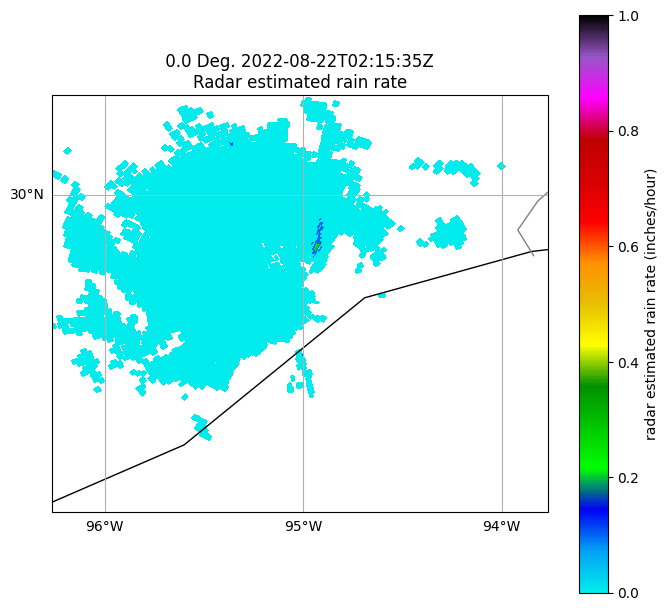

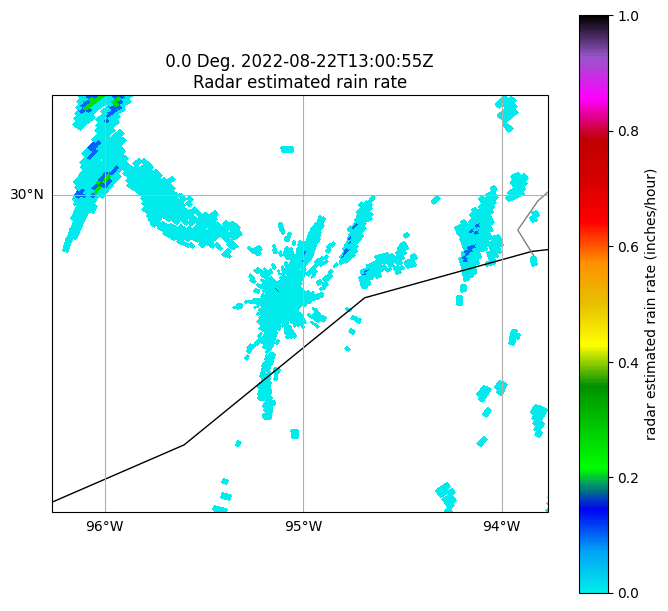

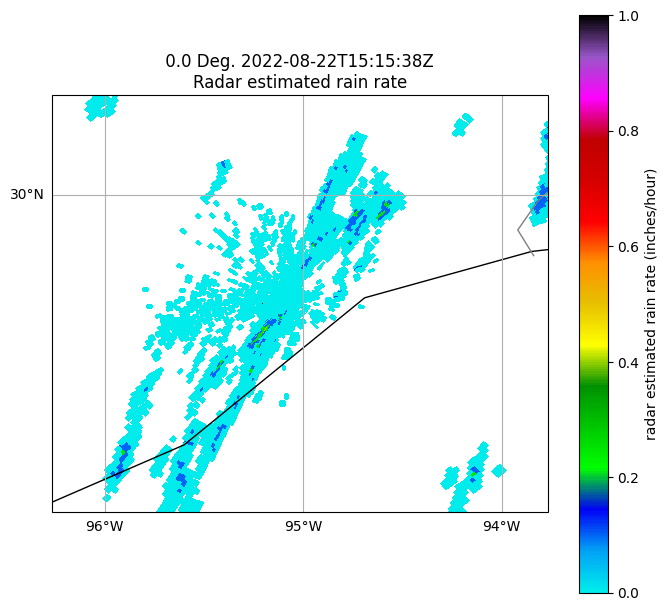

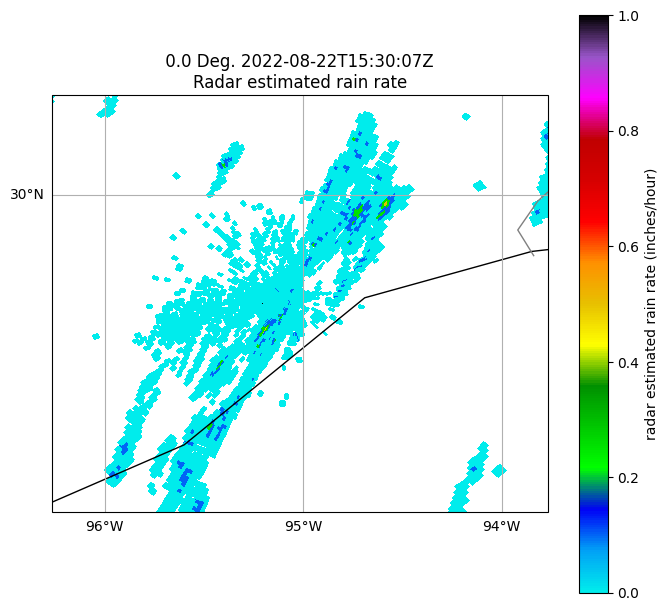

In [ ]:
import pyart
import matplotlib.pyplot as plt

# List of filenames
filenames = [
    #"/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208220045",
    "/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208220215",
    #"/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208220245",
    #"/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208220445",
    #"/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208220530",
    #"/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208220645",
    #"/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208220715",
    #"/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208220745",
    #"/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208220930",
    "/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208221300",
    "/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208221515",
    "/content/drive/My Drive/L3 Data/summer/second/0130/KHGX_SDUS34_N1PHGX_202208221530"

]

rhi_az = 290
scan_num = 0
xmin = -96.5,
xmax = -93.6,
ymin = 27.9,
ymax = 30.9

# Loop through each file and plot the PPI
for filename in filenames:
    radar = pyart.io.read(filename)

    # Set up a Matplotlib figure
    my_figure = plt.figure(figsize=[8,7.5])

    # Set up a Py-ART display instance
    my_display = pyart.graph.RadarMapDisplay(radar)

    # Plot a PPI of the data
    my_display.plot_ppi_map('radar_estimated_rain_rate', scan_num, vmin=0, vmax=1, projection=ccrs.PlateCarree(), cmap='pyart_NWSRef')
    my_display.set_limits(xlim=(-96.267,-93.767), ylim=(28.4,30.5), ax=None)

    # Optionally, save the figure to a file
    #plt.savefig(filename + '_ppi.png')

    # Show the plot
    plt.show()
